### The Spark Foundation - GRIP Task #1
- To predict the percentage of an student based on the no. of study hours. What will be predicted score if a student studies for 9.25 hrs/ day?

In [1]:
import numpy as np                            #importing libraries
import pandas as pd
import matplotlib.pyplot as plt 
import statsmodels.api as sm

In [3]:
df = pd.read_csv("http://bit.ly/w-data")         #reading the dataset in dataframe
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.shape                                       # shape of data set shows 25 records and two columns including the target

(25, 2)

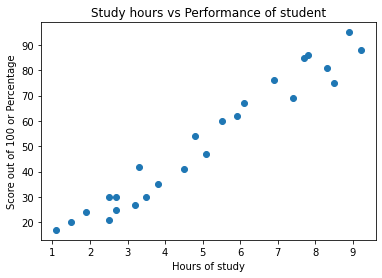

In [6]:
plt.scatter(df.Hours,df.Scores)  # scatter plot to visualise the trend of dependant vs independant variable
plt.xlabel("Hours of study")
plt.ylabel("Score out of 100 or Percentage")
plt.title("Study hours vs Performance of student")
plt.show()

Here in we see a linear relationship between the hours of study and the percentage scored by the student and since we have just two variables a simple linear regression model or Ordinary Least Square fit should give us the best fit line for the requested result.

In [9]:
x = df.Hours          #independant variable
y = df.Scores         #dependant variable

In [10]:
xc = sm.add_constant(x) #adding constant variable 1.0

In [16]:
LR_model = sm.OLS(y,xc)    #Ordinary Least Square model
results = LR_model.fit()   # fitting model

In [17]:
results.summary()          #summary report

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Fri, 09 Jul 2021   Prob (F-statistic):           9.13e-17
Time:                        23:08:57   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.337      -2.753       7.721
Hours          9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
X1 = np.array(9.25)

In [99]:
Y1 = results.params[1]*X1 + results.params[0]  #Y1 = 9.7758*X1 + 2.4837 simple linear equation for the given dataset

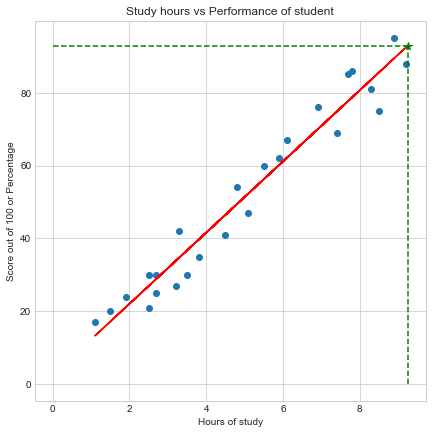

In [100]:
plt.figure(figsize=(7,7))
plt.style.use('seaborn-whitegrid')
plt.plot(x, y_predict,'red')     #plot to visualise the best fit line for dependant vs independant variable
plt.plot(X1,Y1, color='green', marker='*', markersize=8) #point marked as star for performance in 9.25 study hours
plt.plot([X1,X1],[0,Y1], '--',color='green')
plt.plot([0,X1],[Y1,Y1],'--', color='green')
plt.scatter(df.Hours,df.Scores)  
plt.xlabel("Hours of study")
plt.ylabel("Score out of 100 or Percentage")
plt.title("Study hours vs Performance of student")
plt.show()

In [101]:
print(f"If a student studies for {X1} hours, he/she is expected to score {round(Y1,2)} percentage")

If a student studies for 9.25 hours, he/she is expected to score 92.91 percentage
